# Solving classification problem using K-NN

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Grab the dataset 
dataset = pd.read_csv('Classified Data')

# checking the head of the dataset
dataset.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Scaling Features

In [4]:
# importing libraries
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset.drop('TARGET CLASS', axis=1))
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [5]:
# Creating dataframe off of the scaled features
scaled_features_df = pd.DataFrame(data=scaled_features, columns=dataset.columns[:-1])
scaled_features_df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
# Spliting the data into X and y
X = scaled_features

y = dataset['TARGET CLASS']

In [115]:
# Spliting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creating a model

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [117]:
# Do some predictions on it
y_preds = knn.predict(X_test)

In [118]:
# Making a confusion matrix for evaluation
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_preds)
cr = classification_report(y_test, y_preds)

In [119]:
# Evaluating the model using above metrices 
cm

array([[145,  14],
       [ 12, 129]], dtype=int64)

In [120]:
print(f'{cr}')

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# finding the ideal k-value using elbow method

In [126]:
loss_rate = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    loss_rate.append(np.mean(y_preds != y_test))

In [127]:
# creating dataframe for loss rate
loss_rate_df = pd.DataFrame(data=loss_rate, columns=['lOSS RATE'])

In [128]:
loss_rate_df.tail()

,lOSS RATE
34,0.056667
35,0.056667
36,0.060000
37,0.060000
38,0.060000


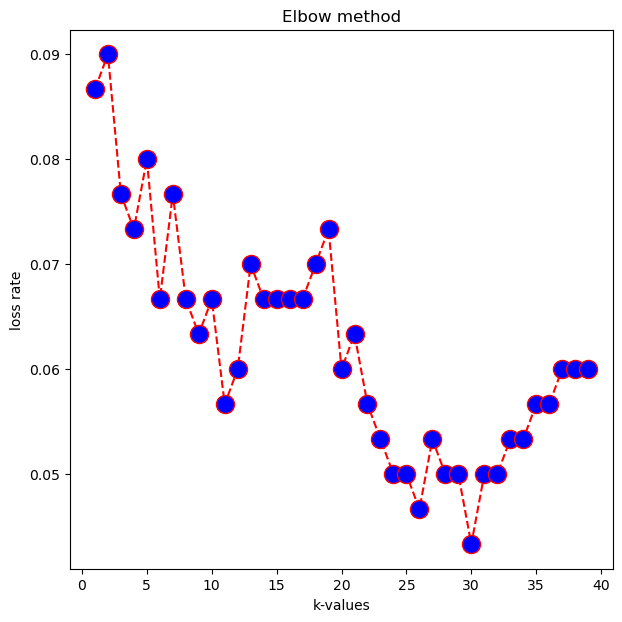

In [129]:
# Visualizing the loss rate in Elbow method to choose best k-value
plt.figure(figsize=(7,7))

plt.plot(range(1, 40), loss_rate_df, color='r', ls='--', marker='o', markerfacecolor='blue', markersize=13)
plt.xlabel('k-values')
plt.ylabel('loss rate')
plt.title('Elbow method')
plt.show();

Since we can see that when the value for k is greater than 40, it has the lowest error rate

In [133]:
# Creating a model again with best k value

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Predicting the model for the sack of evaluation
y_preds = knn.predict(X_test)

<AxesSubplot:>

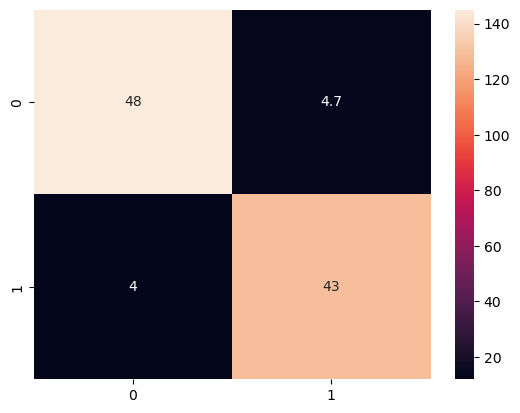

In [134]:
# Evaluation of knn using confusion matrix and comparing the old confusion matrix with the new model for new k value
sns.heatmap(cm, annot=(cm/cm.sum()*100))

<AxesSubplot:>

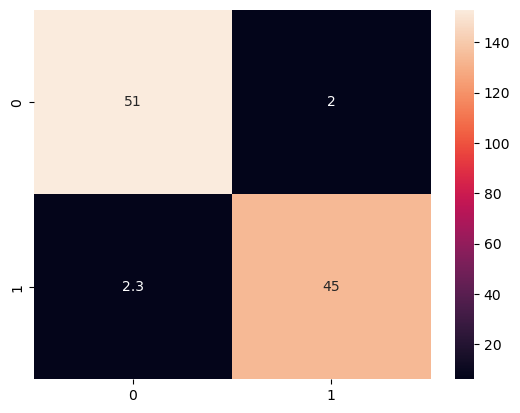

In [135]:
new_cm = confusion_matrix(y_test, y_preds)
sns.heatmap(new_cm, annot=new_cm/new_cm.sum() * 100)